# Practice Case Study - Clustering

-----------------------------------------
## Context
-----------------------------------------

Study of socio-economic factors is foundational to understanding and shaping the future of societies and hence of extreme interest to various government and non-government institutions. While GDP is one of the most popular measure used on popular vernacular, it is not the only measure of the growth and the state of an economy. This case study aims to deep dive into one such dataset that contains various socio-economic attributes for countries around the world.

-----------------------------------------
## Objective
-----------------------------------------

To identify if there exist various cluster of countries that are more similar to each other in terms of certain socio-economic factors

------------------------
## Data Dictionary
-------------------------
The data has the following attributes:
- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports - Exports in % age of the GDP per capita
- health - The total spend on health given as % of GDP
- imports - The value of imports given as % of GDP per capita
- income - The net income per person
- inflation - Inflation rate %
- life_expec - Average life expectancy in years
- total_fer - The fertility rate - Average children per woman in the country
- gdpp - GDP per capita

In the dataset, we will not do clustering on the gdp and would rather try to understand the variation of other factors with GDP across the groups that we formed.

## Importing libraries and overview of the dataset

In [1]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [2]:
data = pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Check the info of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**Observations:**
 
 - There are 167 observations and 10 columns in the data.
 - All columns have 167 non-null values i.e. there are no missing values.
 - All the columns except the country name are numerical.
 - Everything looks great, lets move ahead to check duplicates.

#### Check duplicate entries

In [4]:
data[data.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


- There are no duplicate rows in the data. That's good. 

## Exploratory Data Analysis

#### Summary Statistics

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


**Observations:**

- The child mortality rate has a high range from 2.6 to 208 deaths per 1000 live births. The average child mortality rate is approx 38 deaths per 1000 live births.
- Similarly, the exports and imports have a high range of values. The maximum values for exports and imports is 200% and 174% of GDP respectively. This can happen if a country's  export or import industry exceeds their its domestic economy.
- The total spend on heath is very less as compared to exports and imports for majority of counties. The average spend on health is approx 6.8% of GDP.
- The average life expectancy is approx 70 years but the minimum value is just 32 years.
- Other variables like gdpp, inflation, and income also shows a high variability which can be expected as they can be very different for different countries.
- Overall, % expenditure on health, average life expectancy seem to have lesser standard deviation which reflects less variability across countries. All other variables seem to have very high spread across countries. These are the variables that might help us identify the clusters, if they exist. 

#### Let's check the distribution and outliers for each column in the data

child_mort
Skew : 1.45


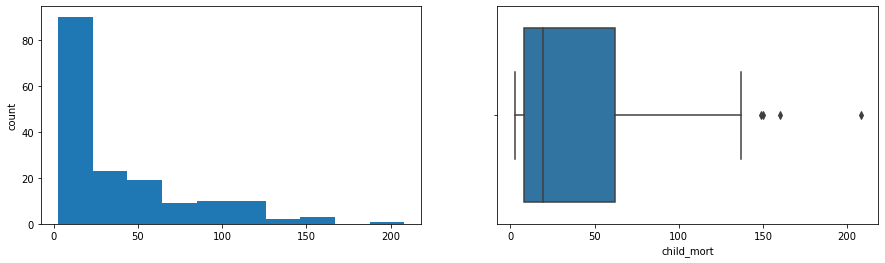

exports
Skew : 2.45


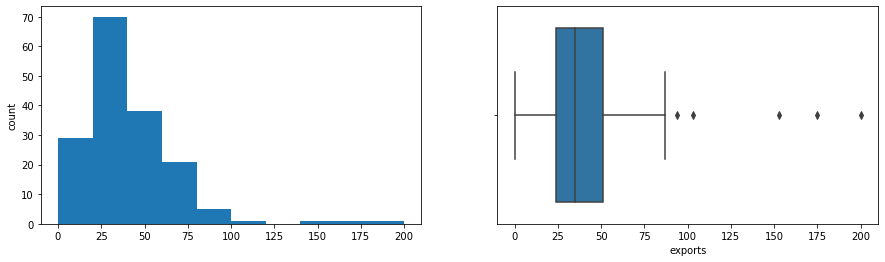

health
Skew : 0.71


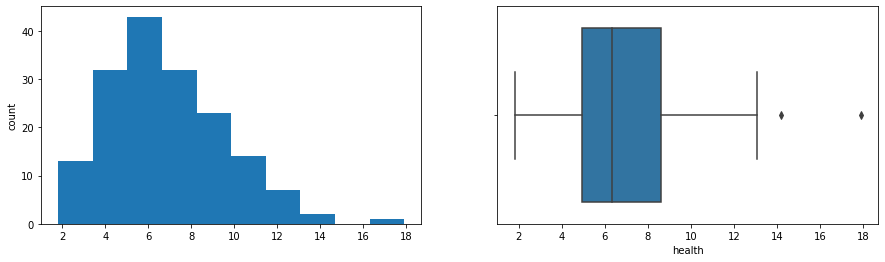

imports
Skew : 1.91


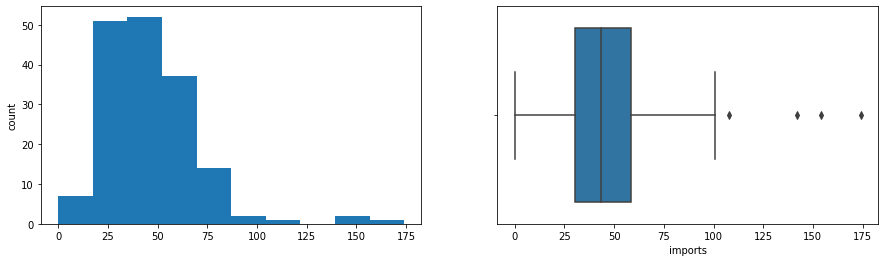

income
Skew : 2.23


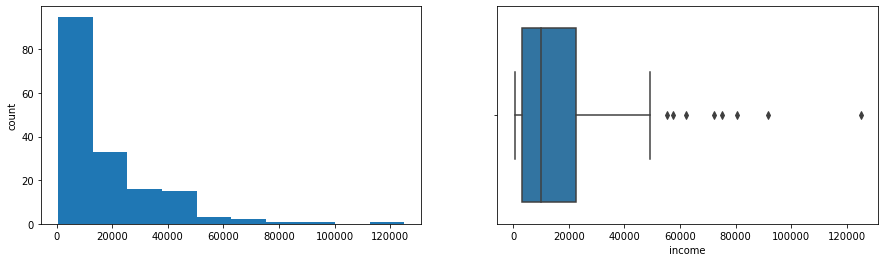

inflation
Skew : 5.15


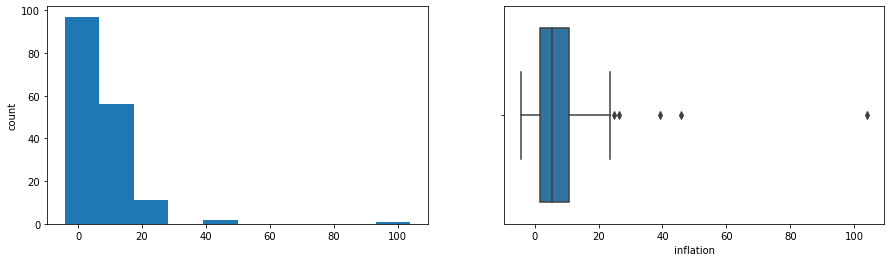

life_expec
Skew : -0.97


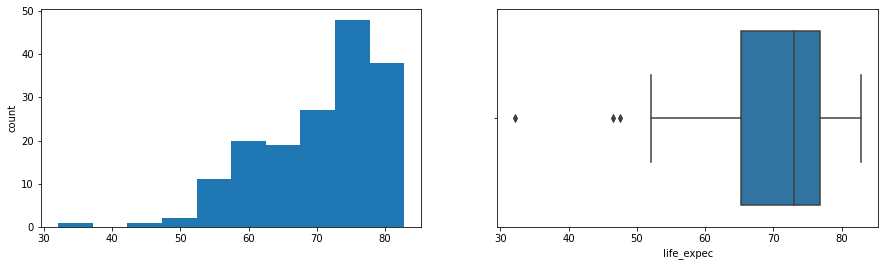

total_fer
Skew : 0.97


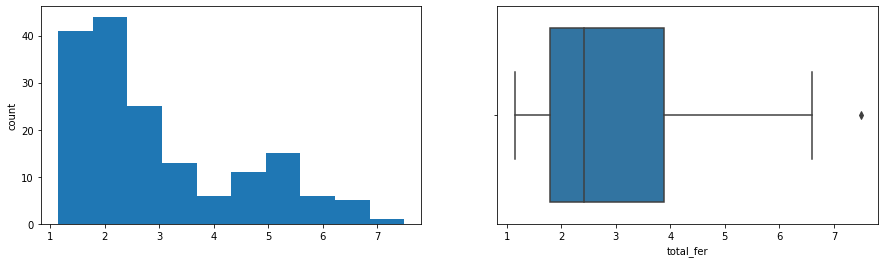

gdpp
Skew : 2.22


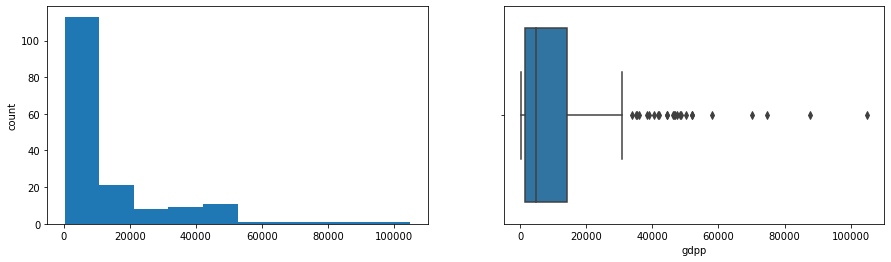

In [6]:
for col in data.columns[1:]:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**

- As observed earlier, most of the variables have skewed distributions
- The distribution for the % expenditure on health is relatively less skewed with fewer outliers
- The life expectancy is the only variable which is skewed to the left meaning most of the countries have already been successful in achieving high life expectancy
- The distribution for all other variables is highly skewed to the right. All these variables have some outliers to the right end.

**Let's check the correlation among the variables**

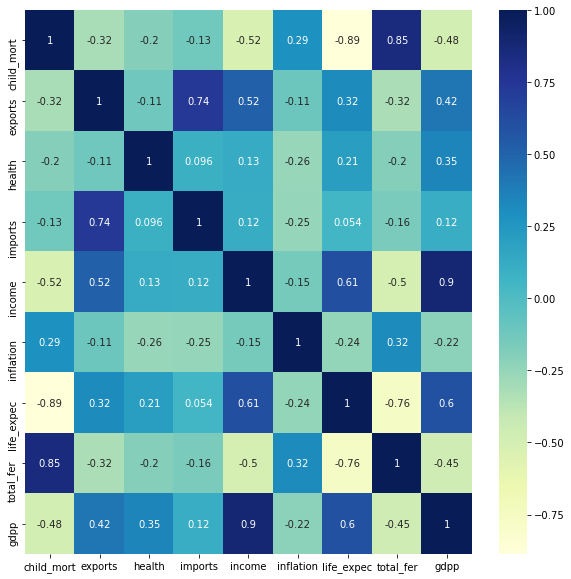

In [7]:
plt.figure(figsize  = (10,10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observations:**

- There is a strong positive correlation between gdpp and income. This makes sense. 
- The life expectancy is positively correlated with gdpp. This indicates that people live longer in richer countries. 
- There is a strong negative correlation between life expectancy and child mortality. This is understandable.
- The child mortality has a strong positive correlation with fertility rate. This indicates that increasing population leads to higher child mortality.

## Scaling the data

- Clustering algorithms are distance based algorithms and all distance based algorithms are affected by the scale of the variables. Therefore, we will scale the data before applying clustering algorithms.
- We will drop the variables `'country'` and `'gdpp'` before scaling the data as we would not use these two variables for clustering the countries.

In [8]:
data_new = data.drop(columns=["country", "gdpp"])

In [9]:
#Scaling the data and storing the output as a new dataframe
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data_new), columns=data_new.columns)

data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


In [10]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

## K-Means Clustering

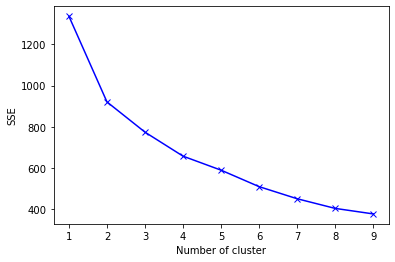

In [11]:
#Empty dictionary to store the SSE for each value of k
sse = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_ 

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

**Observations:**

- We can see from the plot that there is a consistent dip from 2 to 8 and there doesn't seem to be a clear 'elbow' here. We may chose any from 2 to 8 as our # of clusters. 
- So, let's look at another method to get a 'second opinion from maths'. Let's create a plot with Silhouette scores to see how it varies with k.

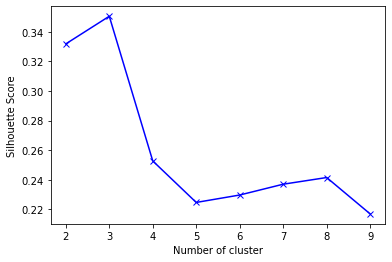

In [12]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

**Observations:**

- We can see from the plot that silhouette score is highest for k=3. Well that makes it slightly easy for us and we can start with first understanding these 3 clusters. So let's take the number of clusters as 3.

In [13]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the original data and scaled data 
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
data['KMeans_Labels'] = kmeans.predict(data_scaled)

In [14]:
data['KMeans_Labels'].value_counts()

0    112
1     52
2      3
Name: KMeans_Labels, dtype: int64

**Observations:**

This looks like a very skewed clustering with a very few observations in one cluster and more than 100 in other. Let's check out the profiles of these clusters

In [15]:
#Calculating mean and median of the original data for each label
mean = data.groupby('KMeans_Labels').mean()
median = data.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,15.703571,88.844231,4.133333,12.450,85.65,2.80
exports,43.487500,28.203827,176.000000,39.600,23.30,175.00
health,7.069464,6.270385,6.793333,6.790,5.48,7.77
imports,46.143750,42.164729,156.666667,44.900,39.75,154.00
income,22069.285714,3832.750000,64033.333333,16250.000,1960.00,72100.00
inflation,6.042920,11.833750,2.468000,3.810,8.95,3.62
life_expec,75.215179,59.892308,81.433333,75.800,60.45,81.30
total_fer,2.119821,4.822115,1.380000,1.995,5.00,1.36
gdpp,16937.535714,1832.884615,57566.666667,8580.000,932.00,46600.00


**Observations:**

It looks like Cluster 2 is of very rich countries with high income and gdpp, Cluster 1 is of very poor countries with low income and gdp and the rest are in cluster 0, which happens to be the biggest cluster as well. So intuitively this makes sense but let's try to visualize the boxplots of different attributes for each cluster to see if we can spot some more granular patterns.  

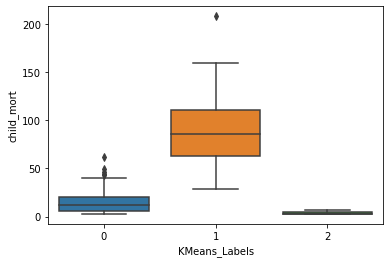

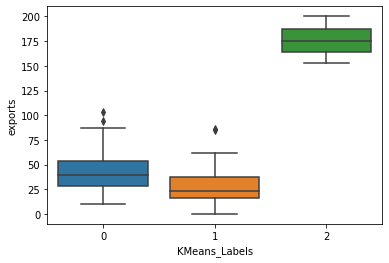

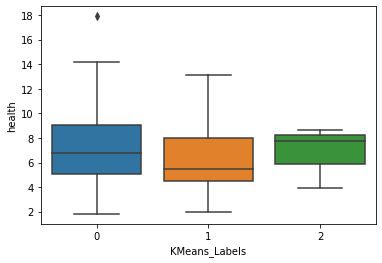

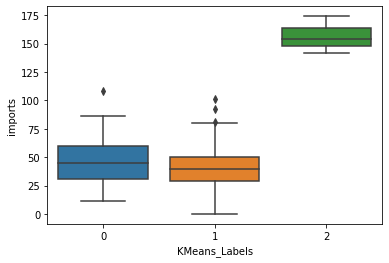

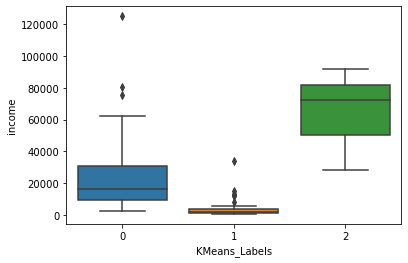

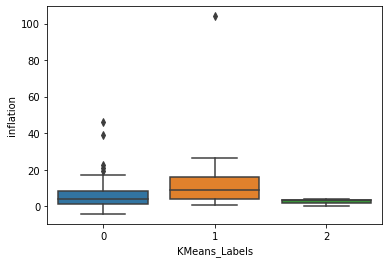

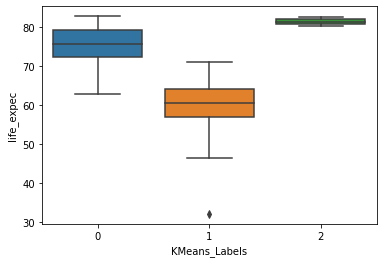

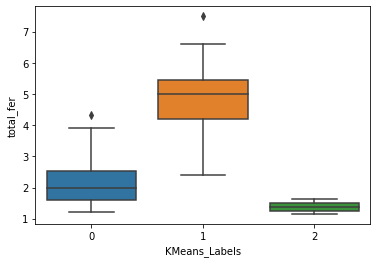

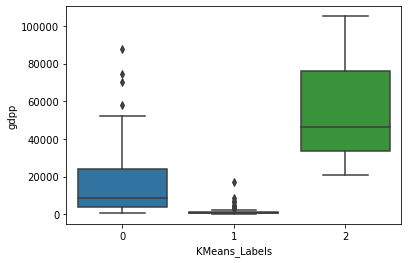

In [16]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data)
    plt.show()

**Cluster Profiles:**

- Cluster 2 has only 3 observations. As observed from scatter plots and boxplots, group 2 **consists of outlier countries** with highest imports and exports as percentage of GDP. These countries also have very high income.
- Cluster 1 seems to have very poor values for many indicators, like highest inflation rate, lowest GDP per capita, lowest exports as well as imports - all signaling towards very poor economic situation, and they also have the highest child mortality, highest fertility, lowest life expectancy - all signaling towards poor state of health care in the country. This cluster shows traits of  **underdeveloped and developing countries** These countries also seem to have a trade deficit i.e. imports are more the exports. When a country has a trade deficit, it must borrow from other countries to pay for the extra imports.
- Cluster 0 is the largest cluster which shows traits of **developing and developed countries**. The countries in this cluster have comparatively better state of affair for many socio-economic factors but  with a large range of values, indicating that this is a mix of many different types of countries. Ideally, we do not want a cluster to be like this as the fundamental idea behind clustering is to 'group similar things' and this cluster seems to have a lot of 'dissimilarity' within it

- Overall, this clustering solution does give us good insights into potential clusters of similar countries but is not very useful as it is impacted by outlier countries resulting in one very small cluster and two very big clusters. We should try other algorithms to see if we can do better. 


But before that, let's validate if these clusters relate well with the GDP of the country. 

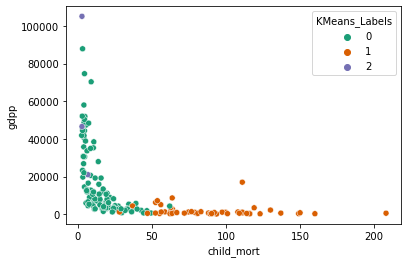

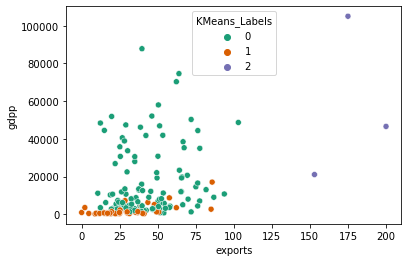

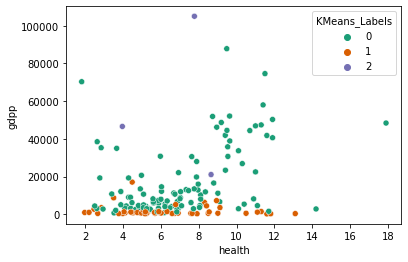

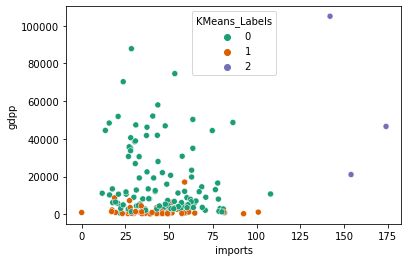

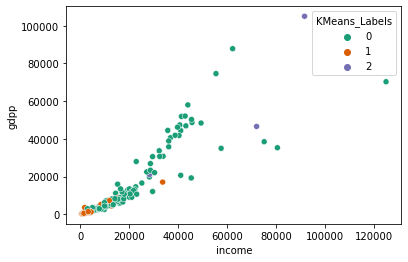

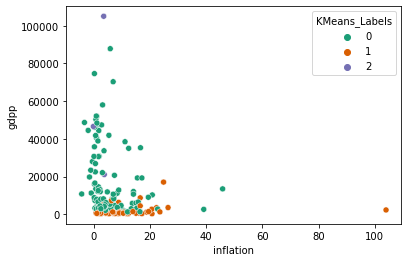

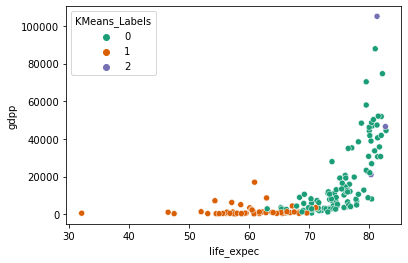

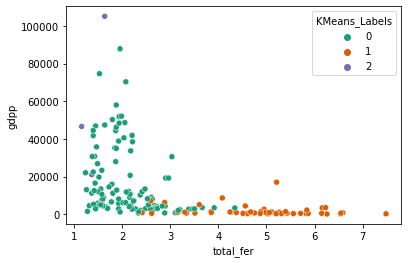

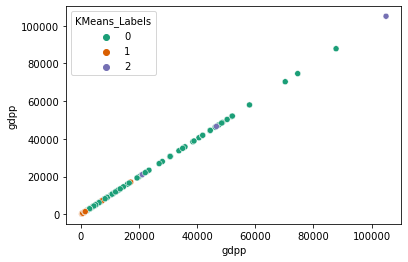

In [17]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.scatterplot(x = col, y = 'gdpp',data = data ,hue='KMeans_Labels', palette='Dark2')
    plt.show()

**Observations:**

- As fertility increases the population of the country increase which results in lower GDP and net income per person.
- Child mortality also negatively impacts the GDP of the country. High child mortality can be due to several reasons like higher population of the country, poverty or lower net income per person, lack of health facilities, etc.

Let's try another algorithm

## K-Medoids Clustering

In [18]:
#Install this to package to use KMedoids
#! pip install scikit-learn-extra

In [19]:
from sklearn_extra.cluster import KMedoids 

In [20]:
kmedo = KMedoids(n_clusters = 3, random_state=1)
kmedo.fit(data_scaled)

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)
data['kmedoLabels'] = kmedo.predict(data_scaled)

In [21]:
data.kmedoLabels.value_counts()

1    75
2    58
0    34
Name: kmedoLabels, dtype: int64

In [22]:
#Calculating mean and median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = data.groupby('kmedoLabels').mean()
median = data.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,7.085294,17.853333,82.951724,4.700,15.70,79.600
exports,36.938235,52.989333,28.191362,31.600,48.30,23.800
health,9.413235,6.202133,6.086379,9.585,6.00,5.275
imports,33.452941,57.694667,40.795964,30.750,55.10,36.800
income,38094.705882,17592.800000,4284.189655,36550.000,13500.00,2145.000
inflation,4.020676,5.511573,12.922328,1.825,3.82,9.225
life_expec,79.614706,73.870667,60.958621,80.200,74.10,60.800
total_fer,1.842353,2.179600,4.589655,1.875,2.13,4.875
gdpp,35925.588235,10989.813333,2057.034483,38700.000,6230.00,994.000


**Observations:**

It looks like Cluster 0 is of very rich countries with high income and gdpp, Cluster 2 is of very poor countries with low income and gdp and the rest are in cluster 1, which happens to be the biggest cluster as well. So intuitively this makes sense but let's try to visualize the boxplots of different attributes for each cluster to see if we can spot some more granular patterns.  

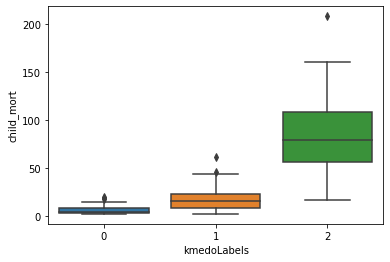

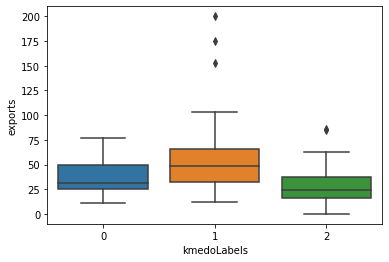

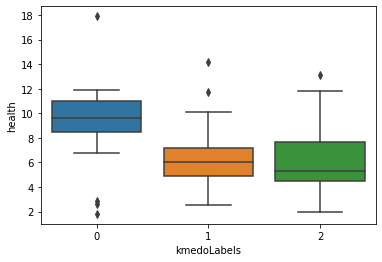

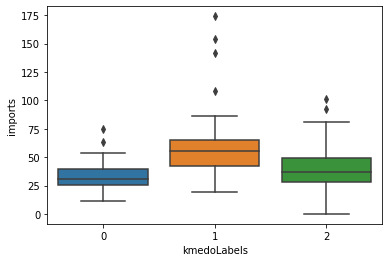

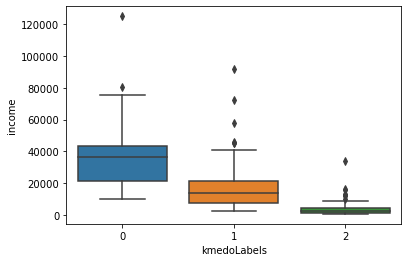

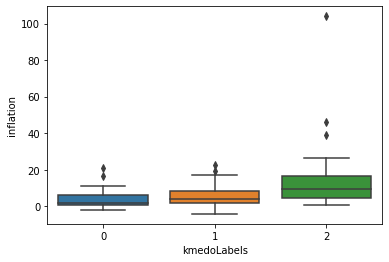

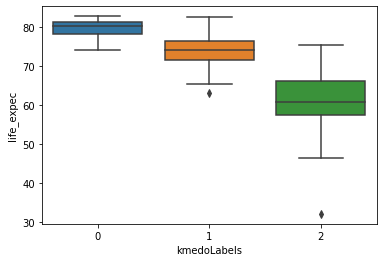

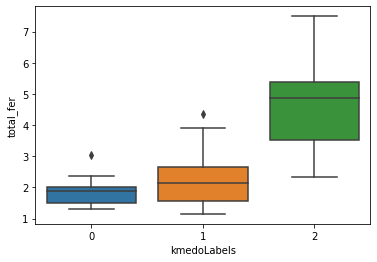

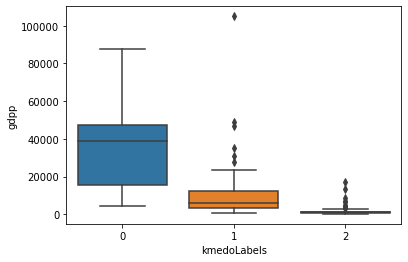

In [23]:
for col in cols_visualise:
    sns.boxplot(x = 'kmedoLabels', y = col, data = data)
    plt.show()

**Cluster Profiles:** 

- Cluster 2 countries have the highest average child mortality rate, trade deficit, inflation rate and least average GDP and net income per person. But the large range of values for different variables implies it contains variety of countries from **underdeveloped to developing**. For example, Afghanistan, Bangladesh, Botswana.
- Cluster 1 shows traits of **developing countries** with comparatively higher GDP, net income per person and significantly lower child mortality rate as compared to cluster 2. The cluster consists of some outliers but majorly it consists of countries with low to medium GDP but comparatively higher imports and exports percentage. For example, Albania, Algeria, Antigua and Barbuda.
- Cluster 0 shows traits of **developed countries** with low child mortality rate and higher net income per person, life expectancy, GDP. These countries have the highest average expenditure on health as percentage of GDP. For example, Australia, Austria, Belgium.

**Observations:**

- The count of observations in each clusters from K-Medoids is more evenly distributed as compared to clusters K-Means.
- This is because clusters from K_Medoids are less affected by outliers in the data. As we can observe that three outlier countries (in terms of imports and exports) are included in cluster 1 and do not form a separate cluster like in K-Means.
- Unlike K-Means, the cluster for developed countries is much bigger but still retains the overall characteristics of developed countries as reflected in higher values for income per person, life expectancy etc. and especially in health expenditure as percentage of GDP.

Now, let's see what we get with GMM

## Gaussian Mixture Clustering

In [24]:
gmm = GaussianMixture(n_components = 3, random_state = 1)
gmm.fit(data_scaled)

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)
data['GmmLabels'] = gmm.predict(data_scaled)

In [25]:
data.GmmLabels.value_counts()

0    67
2    62
1    38
Name: GmmLabels, dtype: int64

In [26]:
#Calculating mean and median of the original data for each label
original_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

mean = data.groupby('GmmLabels').mean()
median = data.groupby('GmmLabels').median()
df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
child_mort,76.459701,5.544737,17.058065,66.80,4.250,16.550
exports,30.704463,60.047368,40.745161,25.00,50.900,35.400
health,6.140000,8.444737,6.547419,5.30,9.405,6.440
imports,43.886058,51.736842,47.166129,42.90,40.950,48.250
income,4578.850746,45431.578947,13386.774194,2520.00,40900.000,12800.000
inflation,11.796642,3.538553,6.043968,8.43,1.395,4.465
life_expec,62.070149,79.707895,74.116129,61.80,80.200,74.150
total_fer,4.404776,1.791579,2.082419,4.60,1.850,2.040
gdpp,2235.880597,40707.105263,7553.870968,1170.00,39750.000,6240.000


**Observations:**

It looks like Cluster 1 is of very rich countries with high income and gdpp, Cluster 0 is of very poor countries with low income and gdp and the rest are in cluster 2. So intuitively this makes sense but let's try to visualize the boxplots of different attributes for each cluster to see if we can spot some more granular patterns.  

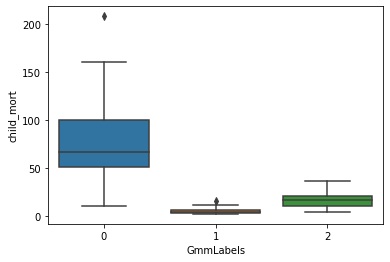

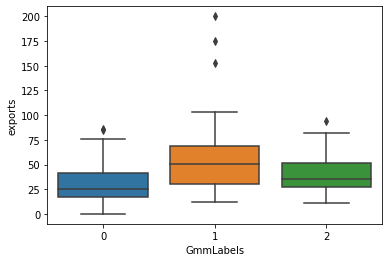

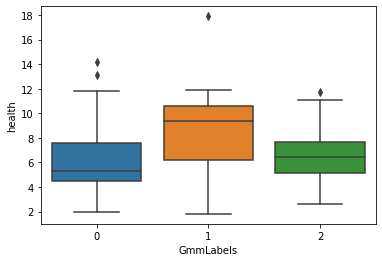

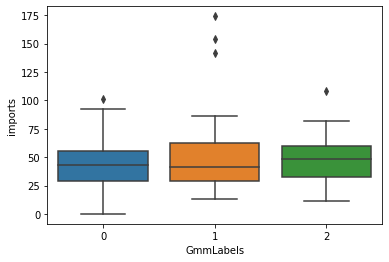

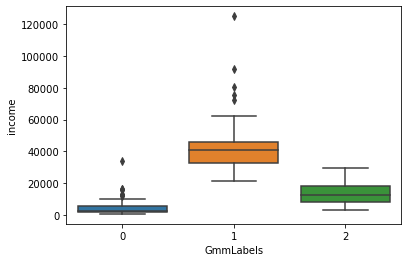

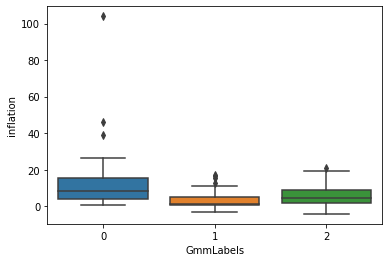

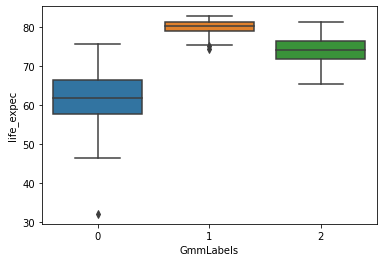

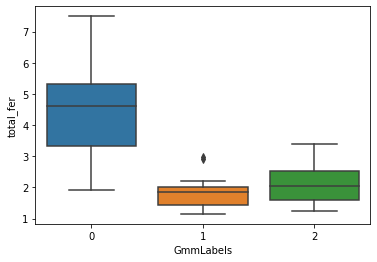

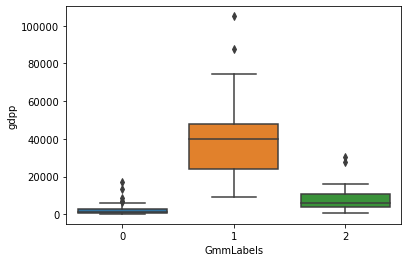

In [27]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'GmmLabels', y = col, data = data)
    plt.show()

**Cluster Profiles:**

- This clustering solution looks very similar to the last one created using K-Medoids with one cluster of 'rich' countries, one of 'poor' and one of 'all others'. But on a closer look, we can identify some important differences in this solution using GMM
- Cluster 1 seems to be of 'developed' countries but this time the median values for all key indicators have all improved in comparison to the same cluster obtained from K-Medoids with higher GDP per capita, higher income, higher exports and imports and marginally higher life expectancy. At the same time, it has lower inflation, lower child mortality, lower fertility as well. Overall, we can say that this cluster has become more 'pure' in comparison to the one from K-Medoids.

- Cluster 0 - Seems to be the one of 'underdeveloped' countries but this time the median values for various factors have all improved in comparison to the K-Medoids solution. For e.g., it has higher GDP per capita, higher income per person, higher exports and imports, and slightly better health expenditure and life expectancy.  This means that this cluster of 'underdeveloped' countries has become less 'pure'

- Both of the above points can give an idea of what might have happened to the third cluster i.e. Cluster 2. It was a mix of 'underdeveloped'& 'developing' countries and continues to be so, but some countries on the rich end of the spectrum seemed to have moved to cluster 1, and some countries on the 'underdeveloped' end have moved to the last cluster, thereby reducing itself in size and resulting in different profiles for all clusters. 

Overall, this is a more evenly distributed clustering solution but thereby reducing the 'uniqueness' of the two extreme clusters.


## Conclusion
Choice of algorithm here will depend on the context and use case. But purely based on foundations of 'what good clustering looks like', one can propose K-Medoids as it has more distinct extreme clusters of developing and underdeveloped countries. 